# Compute performance metrics for the given Y and Y_score without sklearn

In [25]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [27]:
df_a=pd.read_csv('/content/drive/MyDrive/5_Performance_metrics/5_a.csv')
df_a.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [28]:
test = df_a.iloc[:,0]
predict = df_a.iloc[:,1]


In [29]:
df_a.groupby('y').count()

,proba
y,
0.0,100
1.0,10000


In [30]:
# write your code here for task A

In [60]:
def per_metrics(df):
    test = df.iloc[:,0]
    predict = df.iloc[:,1]
    TP = 0         # No.of True Positives
    TN = 0         # No.of True Negatives
    FP = 0         # No.of false Positives
    FN = 0         # No.of false negatives
    tp =[]         # list of true positives
    fp =[]         # list of false positives
    tn =[]         # list of true negatives
    fn =[]         # list of false negatives
    tpr = []       # True positive rate pints
    fpr = []       # False positive rate points

    # calculating TP, FP, TN,FN and and their lists 
    for i in range(len(predict)):
        if predict[i] >= 0.5:      # 0.5 as threshold for classifying points
          y_pred = 1
          if y_pred == test[i]:
              TP +=1
          else:
              FP +=1
        else: 
            y_pred = 0
            if y_pred == test[i]:
              TN +=1
            else:
                FN +=1
        tp.append(TP)
        fp.append(FP)
        tn.append(TN)
        fn.append(FN) 

    # Accuracy
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    print("Accuracy Score - ", accuracy)    
   
   # Calculating for AUC score, tpr and fpr

    df = df.sort_values(by=['proba'], ascending=False)
    probability_score = df['proba'].unique()
    y = df['y'].to_numpy()
    points = []
    for threshold in probability_score:
        threshold_y_pred = np.where(probability_score >= threshold, 1, 0)
        nTP = (np.logical_and(y == 1.0, threshold_y_pred == 1)).sum()
        nFN = (np.logical_and(y == 1.0, threshold_y_pred == 0)).sum()
        nFP = (np.logical_and(y == 0.0, threshold_y_pred == 1)).sum()
        nTN = (np.logical_and(y == 0.0, threshold_y_pred == 0)).sum()
        TPR = nTP/(nTP + nFN)
        FPR = nFP / (nTN + nFP)
        points.append([TPR, FPR])

    tpr_array = np.array([i for i, j in points])
    fpr_array = np.array([j for i, j in points])
    auc_score = np.trapz(tpr_array, fpr_array)
    print('AUC score :', auc_score)

    threshold = sorted(np.unique(df.proba),reverse=True)
    print('threshold - ', threshold)

    # Confusion Matrix
    conf_matrix = [[TP, FP],[FN, TN]]
    print('confusion matrix - ',conf_matrix)
    
    # Precision
    if TP+FP ==0: # Boundary Condition
       precision = 0
    else:
       precision = TP/(TP+FP)
    print('Precision - ',precision)

    # Recall
    if TP+FN ==0: # Boundary Condition
       recall = 0
    else:
       recall = TP/(TP+FN)
    print('Recall - ', recall)

    # F1-score
    if recall+ precision ==0:  # Boundary Condition
       f1 = 'None'
    else:
       f1 = 2*recall*precision/(recall+precision)
    print('F1-score - ', f1)
    
    return auc_score, accuracy, conf_matrix, precision, recall, f1, tpr_array, fpr_array, threshold
      

In [61]:
auc_score_a, accuracy_a, conf_matrix_a, precision_a, recall_a, f1_a, tpr_a, fpr_a, threshold_a = per_metrics(df_a)

Accuracy Score -  0.9900990099009901
AUC score : 0.48829900000000004
threshold -  [0.8999653487823838, 0.899828305041011, 0.89982484614942, 0.8998118120764471, 0.8997678816682531, 0.8997510420266246, 0.8994674890303449, 0.8994444889794935, 0.899429257722646, 0.89941506513672, 0.8992941132435506, 0.8992269895109616, 0.8991733184392765, 0.8991389752622758, 0.8991329817604309, 0.8989599199221757, 0.8989235480855327, 0.8989127735346812, 0.898880479959283, 0.898880001912027, 0.8988420419876608, 0.8988357209415446, 0.8988298499880067, 0.8988099299490411, 0.8987465917613164, 0.8987420185033317, 0.8987139975203338, 0.898695423135265, 0.8986765263351417, 0.8986706728294332, 0.8986413873054466, 0.8986283707249585, 0.8986201897907067, 0.8986160655072233, 0.8984055273597009, 0.8983933386842441, 0.8983216644897749, 0.8981198936490116, 0.8980147047973186, 0.8980139627527257, 0.897998871909405, 0.8979837493095026, 0.8979774805646095, 0.8979645294801951, 0.8979581104830308, 0.8979481614404055, 0.89791

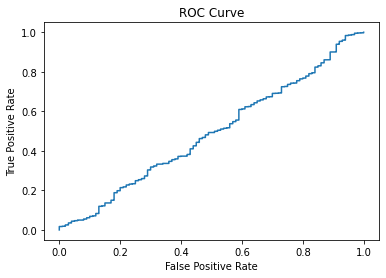

In [65]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot(fpr_a, tpr_a)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [33]:
df_b=pd.read_csv('/content/drive/MyDrive/5_Performance_metrics/5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [34]:
df_b.groupby('y').count()

,proba
y,
0.0,10000
1.0,100


In [35]:
# write your code here for task B

In [67]:
auc_score_b, accuracy_b, conf_matrix_b, precision_b, recall_b, f1_b, tpr_b, fpr_b, threshold = per_metrics(df_b)

Accuracy Score -  0.9718811881188119
AUC score : 0.9377570000000001
threshold -  [0.5952941839776669, 0.5948084022757003, 0.5921978708413235, 0.5901714464524004, 0.5887181867417832, 0.5851746698101434, 0.5832352156485459, 0.5822100493664223, 0.5820204183176829, 0.5817724196688452, 0.5808548686869115, 0.5802582157962942, 0.578717046898288, 0.5717172228244989, 0.5703370387902783, 0.5678946301252379, 0.5661116463342554, 0.5651535828900442, 0.5624777769428778, 0.5616877083303501, 0.5599258050140684, 0.556121619567957, 0.5544063436778339, 0.5540551008906748, 0.5515654901475906, 0.5514838822557268, 0.5510557468414965, 0.5459529397810838, 0.545932326276939, 0.5375777528801543, 0.5364565287715538, 0.5359810098183598, 0.5349179360510354, 0.5347664473062941, 0.5342285647968159, 0.5340927317343263, 0.5327278785648479, 0.5323666310956329, 0.5298016221799585, 0.5296747004635595, 0.5266117817390695, 0.5256781790794008, 0.5226591075929836, 0.5226259807347919, 0.5225359346042691, 0.5220035017704192, 0

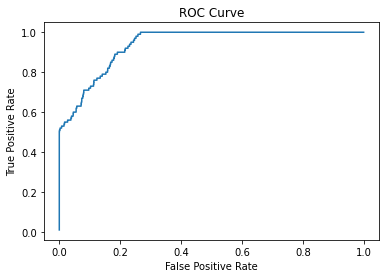

In [69]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot(fpr_b, tpr_b)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [37]:
df_c=pd.read_csv('/content/drive/MyDrive/5_Performance_metrics/5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [38]:
 # write your code for task C

In [39]:
df_c.groupby('y').count()

,prob
y,
0,1805
1,1047


In [40]:
# predicting the class label with 0.5 probablity score as threshold
f = lambda x: 0 if x < 0.5 else 1
df_c['y_pred'] = df_c['prob'].map(f)
df_c.head()

,y,prob,y_pred
0,0,0.458521,0
1,0,0.505037,1
2,0,0.418652,0
3,0,0.412057,0
4,0,0.375579,0


In [41]:
prob_score = list(df_c['prob'])
prob_score.sort()
s = {}

for i in prob_score:
    df_c.loc[df_c['prob'] < i, 'y_pred'] = 0
    df_c.loc[df_c['prob'] > i, 'y_pred'] = 1
    
    FN = int(df_c[(df_c.y == 1) & (df_c.y_pred == 0)].count()[0])
    FP = int(df_c[(df_c.y == 0) & (df_c.y_pred == 1)].count()[0])

    A = (500 * FN) + (100 * FP)
    s[i] = A


In [42]:
min_value = min(s.values())

for threshold in s:
    if s[threshold] == min_value:
        print(f"The minimum value is {min_value} and the threshold is {threshold}.")

The minimum value is 141000 and the threshold is 0.2300390278970873.



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [43]:
df_d=pd.read_csv('/content/drive/MyDrive/5_Performance_metrics/5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [44]:
 # write your code for task 5d

In [45]:
y = df_d.iloc[:, 0]
y_pred = df_d.iloc[:, 1]

In [46]:
#Mean Square Error
MSE = np.sum(np.power(y - y_pred, 2)) / len(y)
print("Mean Square Error - ",MSE)

# Mean Absolute Percentage Error
MAPE = np.sum(np.absolute(y - y_pred)) / np.sum(y)
print("Mean Absolute Percentage Error - ",MAPE)

# R^2 error
y_mean = np.mean(np.absolute(y))
R2_error = 1 - (np.sum(np.power(y - y_pred, 2)) / np.sum(np.power(y - y_mean, 2)))
print("R^2 Error - ",R2_error)

Mean Square Error -  177.16569974554707
Mean Absolute Percentage Error -  0.1291202994009687
R^2 Error -  0.9563582786990937
